In [7]:
from sklearn.metrics import accuracy_score
from sklearn import svm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

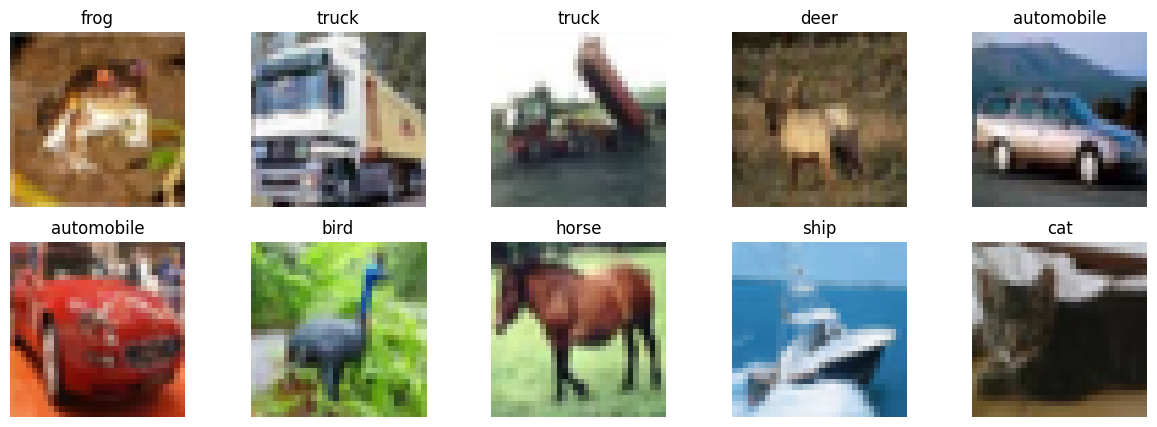

In [15]:

# Function to load a batch
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load all batches
data_batches = []
labels_batches = []
for i in range(1, 6):
    batch = load_cifar10_batch(Path.cwd().parent / 'data' / 'cifar-10-batches-py' / f'data_batch_{i}')
    data_batches.append(batch[b'data'])
    labels_batches.append(batch[b'labels'])

X_train = np.concatenate(data_batches)
y_train = np.concatenate(labels_batches)

# Load test batch
test_batch = load_cifar10_batch(Path.cwd().parent / 'data' / 'cifar-10-batches-py' / f'data_batch_{i}')
X_test = test_batch[b'data']
y_test = test_batch[b'labels']

# Reshape data to 32x32x3
X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0, 2, 3, 1)
X_test = X_test.reshape((len(X_test), 3, 32, 32)).transpose(0, 2, 3, 1)

# CIFAR-10 labels
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

def plot_cifar10_images(images, labels, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n // 2, i + 1)
        plt.imshow(images[i])
        plt.title(cifar10_labels[labels[i]])
        plt.axis('off')
    plt.show()

# Display first 10 images from the training set
plot_cifar10_images(X_train, y_train)
